In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

09/18/2019 17:16:28 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
09/18/2019 17:16:30 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-3_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
09/18/2019 17:16:32 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
09/18/2019 17:16:34 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/

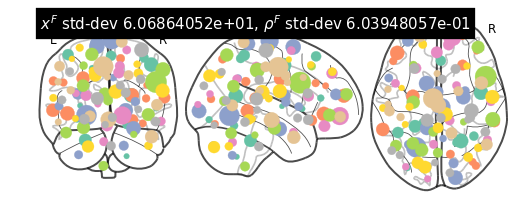

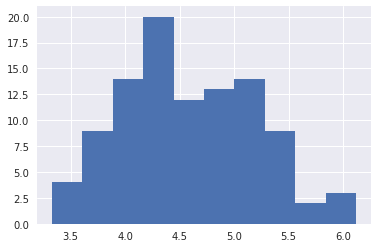

(<nilearn.plotting.displays.OrthoProjector at 0x7f35f5f869b0>,
 tensor([[-3.2534e+01, -8.3116e+01, -9.9800e+00],
         [ 5.0504e+01,  1.4783e+01,  1.4512e+00],
         [ 1.3359e-01,  3.4340e+01,  1.2714e+01],
         [-1.6443e+01, -3.5274e+01,  4.2946e+01],
         [ 1.9231e+01, -5.4078e+01, -4.9064e+01],
         [ 3.7611e+01, -4.9942e+01,  5.4363e+01],
         [-2.4256e+01, -3.9610e+01, -3.2129e+01],
         [ 2.8514e+00,  2.9393e+01,  5.6570e+01],
         [-2.9750e+01, -6.4683e+00,  4.0947e+00],
         [ 2.4097e+01, -5.5062e+01,  1.4972e+01],
         [ 1.9185e+01, -5.6833e+01, -1.6361e+01],
         [ 4.5161e+01, -4.2825e+00,  4.7291e+01],
         [-4.2291e+01, -4.6151e+01,  5.7773e+01],
         [ 1.2906e+01, -6.8977e+01,  5.3725e+01],
         [-2.6539e+01, -8.0016e+00,  3.3120e+01],
         [-4.3016e+01,  3.7571e+01, -3.9886e+00],
         [ 2.4924e+01,  5.8586e+01,  1.5127e+01],
         [ 3.9745e+01, -8.1106e+01,  1.1741e+01],
         [ 4.0397e+01,  3.9459e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1500, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    blocks_filter=lepping_db.inference_filter(training=True))

09/18/2019 17:24:20 [Epoch 1] (25142ms) Posterior free-energy 1.17015360e+09 = KL from prior 1.44861525e+06 - log-likelihood -1.16870477e+09
09/18/2019 17:24:20 Saving checkpoint...
09/18/2019 17:24:45 [Epoch 2] (24765ms) Posterior free-energy 1.11944666e+09 = KL from prior 1.34926962e+06 - log-likelihood -1.11809728e+09
09/18/2019 17:25:09 [Epoch 3] (24204ms) Posterior free-energy 1.08432410e+09 = KL from prior 1.27132800e+06 - log-likelihood -1.08305267e+09
09/18/2019 17:25:34 [Epoch 4] (24610ms) Posterior free-energy 1.05728000e+09 = KL from prior 1.20186100e+06 - log-likelihood -1.05607808e+09
09/18/2019 17:25:59 [Epoch 5] (24720ms) Posterior free-energy 1.03705773e+09 = KL from prior 1.14097488e+06 - log-likelihood -1.03591693e+09
09/18/2019 17:26:22 [Epoch 6] (23692ms) Posterior free-energy 1.02091328e+09 = KL from prior 1.08058525e+06 - log-likelihood -1.01983277e+09
09/18/2019 17:26:46 [Epoch 7] (23910ms) Posterior free-energy 1.00842592e+09 = KL from prior 1.02407862e+06 - log

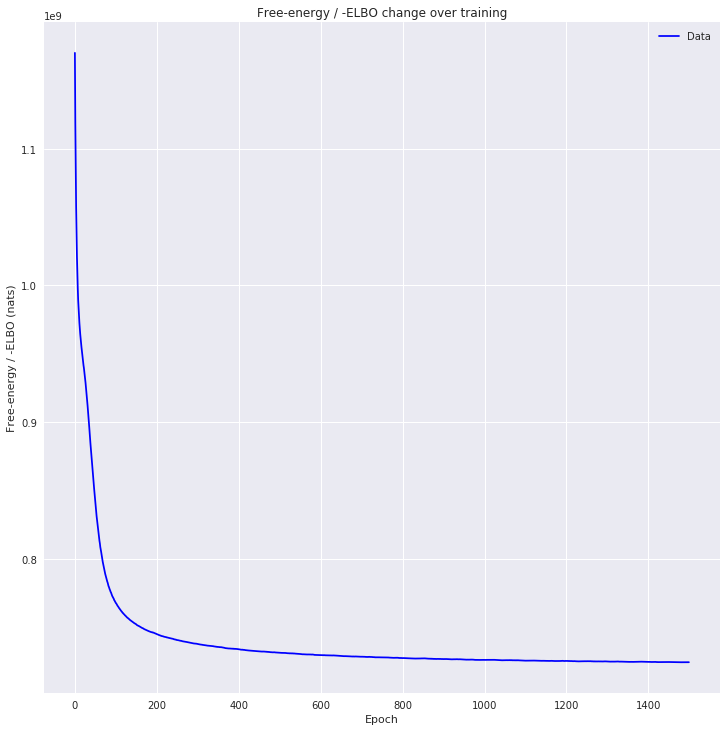

In [9]:
utils.plot_losses(losses)

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=False, blocks_filter=lepping_db.inference_filter(training=False))

09/19/2019 02:45:50 [Epoch 1] (4364ms) Posterior free-energy 3.53101664e+08 = KL from prior 1.38480688e+06 - log-likelihood -3.51716864e+08
09/19/2019 02:45:50 Saving checkpoint...
09/19/2019 02:45:55 [Epoch 2] (4318ms) Posterior free-energy 3.45753824e+08 = KL from prior 1.34913888e+06 - log-likelihood -3.44404672e+08
09/19/2019 02:45:59 [Epoch 3] (4306ms) Posterior free-energy 3.43879680e+08 = KL from prior 1.34067088e+06 - log-likelihood -3.42539040e+08
09/19/2019 02:46:03 [Epoch 4] (4295ms) Posterior free-energy 3.35791072e+08 = KL from prior 1.30563425e+06 - log-likelihood -3.34485440e+08
09/19/2019 02:46:08 [Epoch 5] (4305ms) Posterior free-energy 3.31883360e+08 = KL from prior 1.29761850e+06 - log-likelihood -3.30585792e+08
09/19/2019 02:46:12 [Epoch 6] (4300ms) Posterior free-energy 3.25406880e+08 = KL from prior 1.25468575e+06 - log-likelihood -3.24152192e+08
09/19/2019 02:46:16 [Epoch 7] (4317ms) Posterior free-energy 3.19914048e+08 = KL from prior 1.24654525e+06 - log-likeli

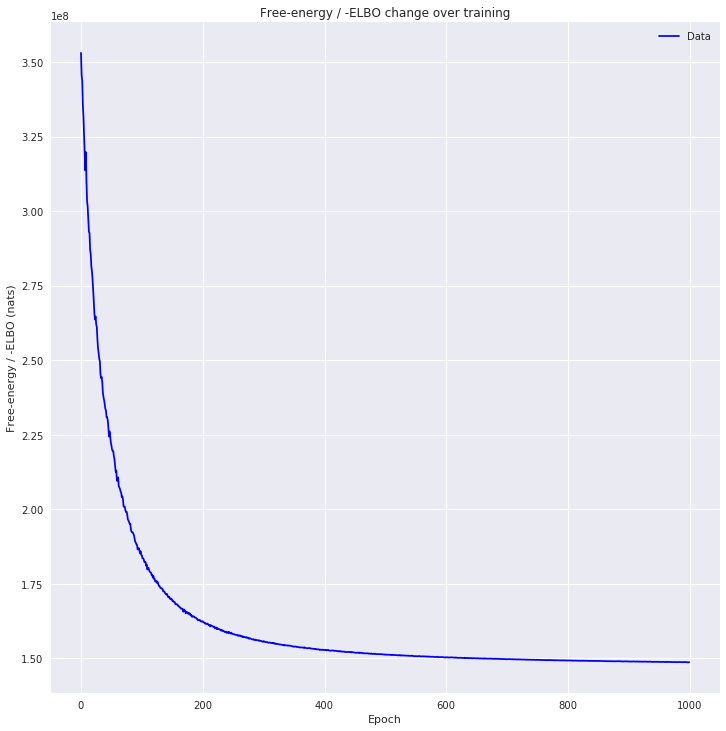

In [11]:
utils.plot_losses(losses)

In [12]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=15, num_particles=1, sample_size=100,
                 blocks_filter=lepping_db.inference_filter(training=True))

[[724078656.0, -720927680.0, 3150995.25],
 [724106944.0, -720899264.0, 3153301.25]]

In [13]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=15, num_particles=1, sample_size=100,
                 blocks_filter=lepping_db.inference_filter(training=False))

[[148687648.0, -148211648.0, 476009.15625],
 [148730448.0, -148156208.0, 477749.5]]

In [14]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [15]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    else:
        task = task.capitalize()
    return task

In [16]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

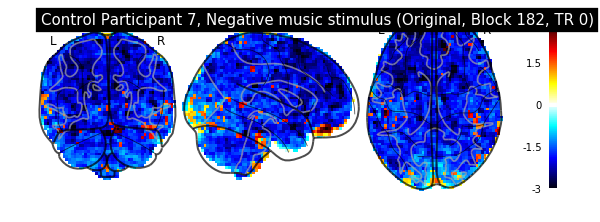

09/19/2019 04:22:40 Reconstruction Error (Frobenius Norm): 5.32380981e+02 out of 1.02908289e+03


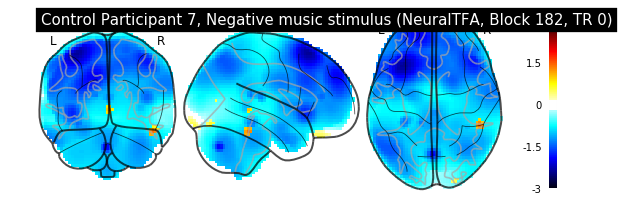

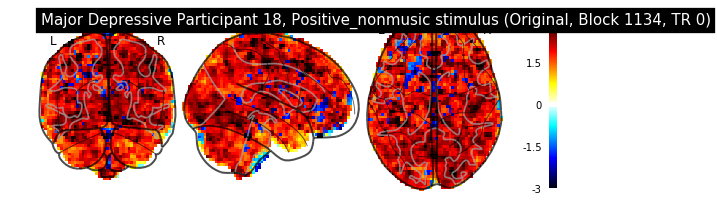

09/19/2019 04:22:43 Reconstruction Error (Frobenius Norm): 5.83780396e+02 out of 9.59336426e+02


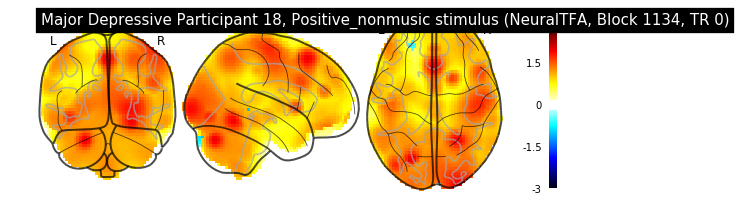

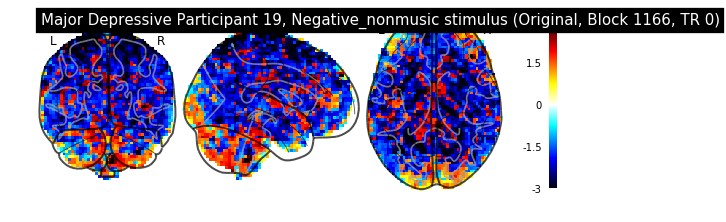

09/19/2019 04:22:46 Reconstruction Error (Frobenius Norm): 7.04021118e+02 out of 8.04382874e+02


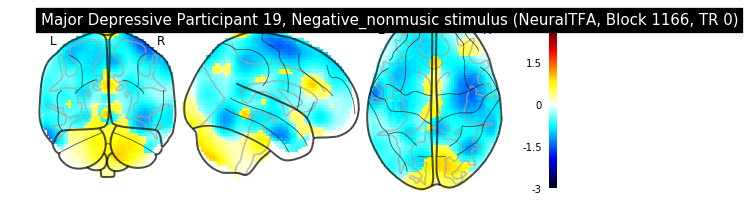

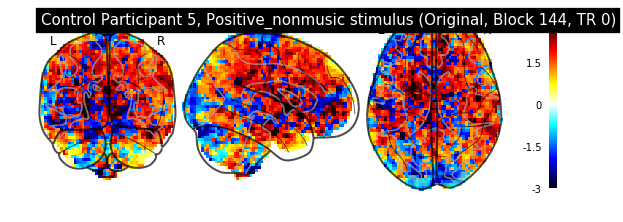

09/19/2019 04:22:49 Reconstruction Error (Frobenius Norm): 6.04037964e+02 out of 8.05481567e+02


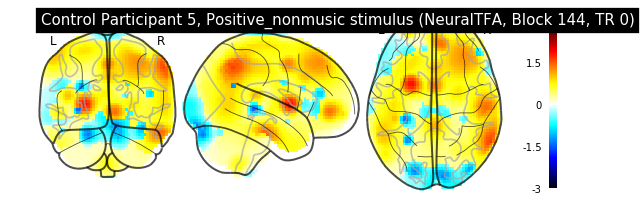

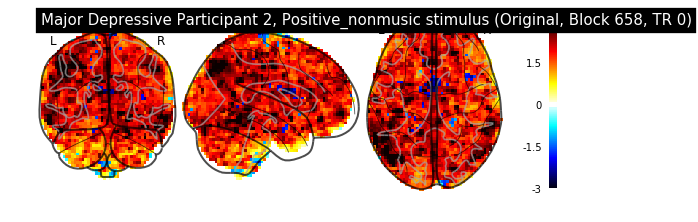

09/19/2019 04:22:52 Reconstruction Error (Frobenius Norm): 5.09289856e+02 out of 6.63270447e+02


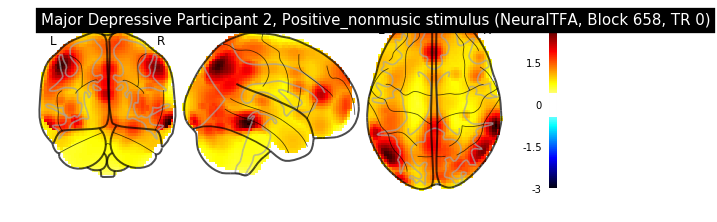

In [17]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


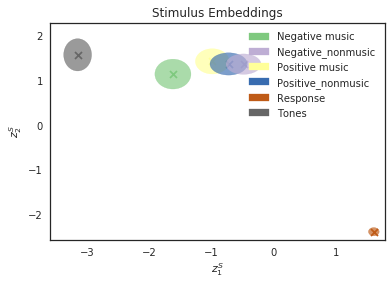

In [18]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


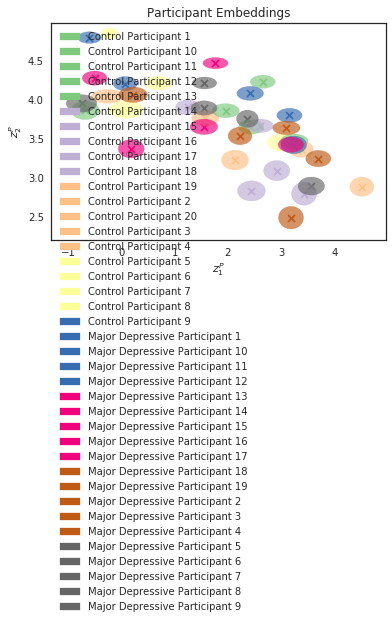

In [19]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

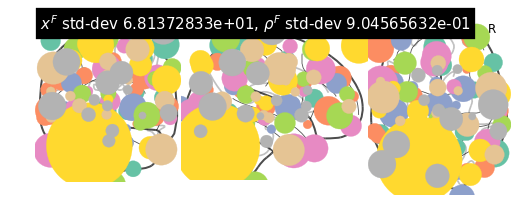

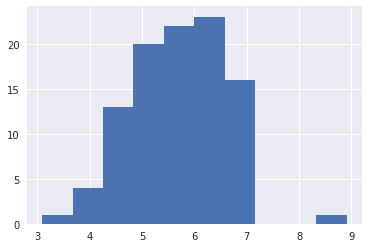

(<nilearn.plotting.displays.OrthoProjector at 0x7f35d83769e8>,
 tensor([[-3.3260e+01, -9.9503e+01, -2.7909e+01],
         [ 5.8077e+01,  2.7429e+01,  1.2476e+01],
         [-3.4474e+00,  4.3992e+01, -1.6750e+00],
         [-2.5900e+01, -2.8025e+01,  4.1177e+01],
         [ 2.6177e+01, -4.6098e+01, -6.2376e+01],
         [ 5.9783e+01, -6.7704e+01,  6.8266e+01],
         [-2.6312e+01, -3.9405e+01, -2.1772e+01],
         [ 3.3534e+00,  2.4690e+01,  8.6343e+01],
         [-3.0592e+01, -4.0994e+00,  4.6483e+00],
         [ 3.0425e+01, -4.7132e+01,  1.7812e+01],
         [ 1.9720e+01, -6.2208e+01, -1.7978e+00],
         [ 3.8010e+01, -1.4384e+00,  5.3808e+01],
         [-6.0637e+01, -4.8036e+01,  7.2310e+01],
         [ 4.5040e+00, -7.4434e+01,  5.0846e+01],
         [-2.5303e+01, -6.9805e+00,  3.5689e+01],
         [-6.1733e+01,  4.2425e+01, -6.6852e-01],
         [ 2.7237e+01,  6.8262e+01,  1.4390e+01],
         [ 3.0017e+01, -8.5669e+01,  2.1213e+01],
         [ 3.7129e+01,  5.3987e+01,  

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error()

09/19/2019 04:23:47 Average reconstruction error (MSE): 6.68935767e-01
09/19/2019 04:23:47 Average data norm (Euclidean): 9.63051332e-01
09/19/2019 04:23:47 Percent average reconstruction error: 0.271844


(0.6689357668334031, 0.9630513315252632, 0.002718436399899684)

In [22]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


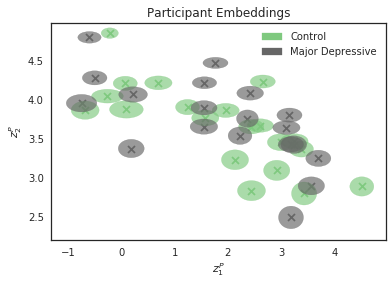

In [23]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)

In [24]:
dtfa.average_reconstruction_error(weighted=False)

09/19/2019 04:24:39 Average reconstruction error (MSE): 4.56721646e+02 +/- 1.95753063e+02
09/19/2019 04:24:39 Average data norm (Euclidean): 6.49919475e+02 +/- 2.93703974e+02
09/19/2019 04:24:39 Percent average reconstruction error: 72.300569 +/- 1.35621382e+01


(array([585.26208496, 161.52522278, 523.12335205, ..., 704.02111816,
        661.18450928, 690.36987305]),
 array([1174.47668457,  370.93035889,  983.57342529, ...,  804.38287354,
         790.49334717,  846.68164062]),
 array([0.49831733, 0.4354597 , 0.53185999, ..., 0.87523136, 0.83642008,
        0.81538307]))